In [24]:

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target'] = diabetes.target
df.describe()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2023
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
lr.fit(X_train,y_train)
from sklearn.metrics import r2_score, mean_squared_error
pred = lr.predict(X_test)
r2_score(y_test,pred), mean_squared_error(y_test,pred)

(0.2906241522424071, 4598.98205785851)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


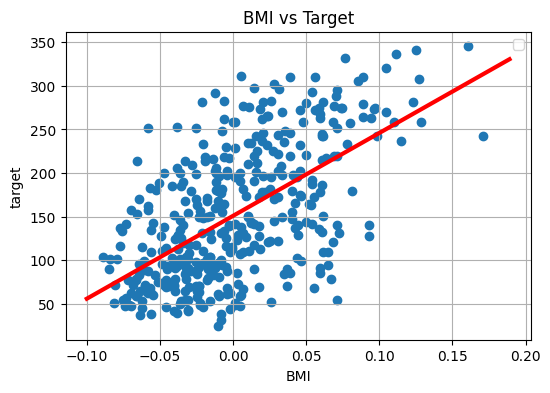

In [30]:
xs = np.array([-0.1,0.189])
ys = np.dot(lr.coef_[0], xs) + lr.intercept_
plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train)
plt.plot(xs,ys, 'r-', lw=3)
plt.grid(),plt.legend()
plt.xlabel('BMI'), plt.ylabel('target')
plt.title('BMI vs Target')
plt.show;

In [31]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2023
)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, diabetes.target)
    lr_score = lr.score(X, diabetes.target)
    pred_lr = lr.predict(X_test)
    r2_lr = r2_score(y_test, pred_lr)
    mse_lr = mean_squared_error(y_test, pred_lr)

In [34]:
from sklearn.svm import SVR
svr = SVR()
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    svr.fit(X, diabetes.target)
    sv_score = svr.score(X, diabetes.target)
    pred_sv = svr.predict(X_test)
    r2_sv = r2_score(y_test, pred_sv)
    mse_sv = mean_squared_error(y_test,pred_sv)


In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    rfr.fit(X, diabetes.target)
    rf_score = rfr.score(X, diabetes.target)
    pred_rf = rfr.predict(X_test)
    r2_rf = r2_score(y_test, pred_rf)
    mse_rf = mean_squared_error(y_test, pred_rf)

In [36]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    xgr.fit(X, diabetes.target)
    pred_xg = xgr.predict(X_test)
    r2_xg = r2_score(y_test, pred_xg)
    xg_score = xgr.score(X, diabetes.target)
    mse_xg = mean_squared_error(y_test, pred_xg)

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=2023)
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    ridge.fit(X, diabetes.target)
    pred_rg = ridge.predict(X_test)
    r2_rg = r2_score(y_test, pred_xg)
    rg_score = ridge.score(X, diabetes.target)
    mse_rg = mean_squared_error(y_test, pred_rg)

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=2023)
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    lasso.fit(X, diabetes.target)
    pred_ls = lasso.predict(X_test)
    r2_ls = r2_score(y_test, pred_ls)
    ls_score = lasso.score(X, diabetes.target)
    mse_ls = mean_squared_error(y_test, pred_rg)

In [44]:
print('\t\tLR\tSV\tRF\tXG\tRG\tLS')
print(f'R squared\t{r2_lr:.2f}\t{r2_sv:.2f}\t{r2_rf:.2f}\t{r2_xg:.2f}\t{r2_rg:.2f}\t{r2_ls:.2f}')
print(f'Mean squared E\t{mse_lr:.2f}\t{mse_sv:.2f}\t{mse_rf:.2f}\t{mse_xg:.2f}\t{mse_rg:.2f}\t{mse_ls:.2f}')

		LR	SV	RF	XG	RG	LS
R squared	0.26	0.13	0.13	0.10	0.10	0.10
Mean squared E	4804.75	5643.58	5655.24	5815.15	5446.72	5446.72


In [61]:
df = pd.read_csv('../01.Intro/pima-indians-diabetes.csv',skiprows=9,header=None)
df.columns = ['P','G','BP','S','I','BMI','D','Age','Target']
df.head()

,P,G,BP,S,I,BMI,D,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
from sklearn.preprocessing import MinMaxScaler
min_max_df = MinMaxScaler().fit_transform(df)
min_max_df

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])

In [76]:
X = df.iloc[:,:-1].values
y= df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2,stratify=y, random_state=2023
)

In [63]:
from sklearn.svm import SVC
svc = SVC(random_state=2023)
params = {'C': [0.01,0.1,1,10,100]}

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
lrc = LogisticRegression(random_state=2023)
svc = SVC(probability=True,random_state=2023)
knn = KNeighborsClassifier()
voc = VotingClassifier(
    estimators=[('LRC',lrc),('SVC',svc),('Knn',knn)],
    voting='soft'
)
params = {
    'LRC__C' : [0.04,0.05,0.06],
    'SVC__C' : [0.5,0.6,0.7]
}
from sklearn.model_selection import GridSearchCV
grid_voc = GridSearchCV(voc, params, scoring='accuracy',cv=5)
grid_voc.fit(X_train,y_train)
grid_voc.best_params_
grid_voc.best_estimator_.score(X_test,y_test)


0.7402597402597403

In [81]:
voc.fit(X_train,y_train)
voc.score(X_test,y_test)

0.7532467532467533

In [83]:
voc.predict_proba(X_test)

array([[0.78438995, 0.21561005],
       [0.15066662, 0.84933338],
       [0.78061971, 0.21938029],
       [0.6077211 , 0.3922789 ],
       [0.73678071, 0.26321929],
       [0.91602814, 0.08397186],
       [0.89837324, 0.10162676],
       [0.39672183, 0.60327817],
       [0.15740728, 0.84259272],
       [0.94396254, 0.05603746],
       [0.94428712, 0.05571288],
       [0.17470584, 0.82529416],
       [0.41104033, 0.58895967],
       [0.75348015, 0.24651985],
       [0.66290971, 0.33709029],
       [0.72316058, 0.27683942],
       [0.03816146, 0.96183854],
       [0.70060151, 0.29939849],
       [0.76792014, 0.23207986],
       [0.39436566, 0.60563434],
       [0.89784865, 0.10215135],
       [0.80873042, 0.19126958],
       [0.31838506, 0.68161494],
       [0.14407284, 0.85592716],
       [0.7002353 , 0.2997647 ],
       [0.65360598, 0.34639402],
       [0.83233929, 0.16766071],
       [0.44500958, 0.55499042],
       [0.41090479, 0.58909521],
       [0.8175403 , 0.1824597 ],
       [0.

In [85]:
lrc.C, svc.C

(1.0, 1.0)

In [108]:

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

In [133]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred =xgb.predict(X_test)
xgb.score(X_test,y_test)

0.7402597402597403

In [125]:
xgb.feature_importances_

array([0.09066359, 0.2663059 , 0.09435336, 0.08702839, 0.09358254,
       0.14115326, 0.099765  , 0.12714794], dtype=float32)

In [134]:
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train,y_train)
rfc_pred =rfc.predict(X_test)
rfc.score(X_test,y_test)

0.7597402597402597

In [135]:
lgb = LGBMClassifier()
evals = [(X_test,y_test)]
lgb.fit(X_train,y_train, eval_set=evals, eval_metric='logloss', verbose=True)
lgb_pred =lgb.predict(X_test)
lgb.score(X_test,y_test)

[1]	valid_0's binary_logloss: 0.615506
[2]	valid_0's binary_logloss: 0.5971
[3]	valid_0's binary_logloss: 0.57897
[4]	valid_0's binary_logloss: 0.562392
[5]	valid_0's binary_logloss: 0.546361
[6]	valid_0's binary_logloss: 0.53331
[7]	valid_0's binary_logloss: 0.523093
[8]	valid_0's binary_logloss: 0.515014
[9]	valid_0's binary_logloss: 0.506786
[10]	valid_0's binary_logloss: 0.503446
[11]	valid_0's binary_logloss: 0.496683
[12]	valid_0's binary_logloss: 0.492718
[13]	valid_0's binary_logloss: 0.488116
[14]	valid_0's binary_logloss: 0.484265
[15]	valid_0's binary_logloss: 0.480535
[16]	valid_0's binary_logloss: 0.481302
[17]	valid_0's binary_logloss: 0.482878
[18]	valid_0's binary_logloss: 0.48072
[19]	valid_0's binary_logloss: 0.479572
[20]	valid_0's binary_logloss: 0.482852
[21]	valid_0's binary_logloss: 0.484995
[22]	valid_0's binary_logloss: 0.487411
[23]	valid_0's binary_logloss: 0.489001
[24]	valid_0's binary_logloss: 0.489422
[25]	valid_0's binary_logloss: 0.487815
[26]	valid_0's

0.7272727272727273

In [146]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print(confusion_matrix(y_test,xgb_pred))
print(confusion_matrix(y_test,lgb_pred))
print(confusion_matrix(y_test,rfc_pred))

[[83 17]
 [23 31]]
[[81 19]
 [23 31]]
[[84 16]
 [21 33]]


In [151]:
confusion_matrix(y_test,xgb_pred)[0][0]+confusion_matrix(y_test,xgb_pred)[1][1]

114

31

In [155]:
# 정확도
xgb_acc = (confusion_matrix(y_test,xgb_pred)[0][0]+confusion_matrix(y_test,xgb_pred)[1][1]/sum(sum(confusion_matrix(y_test,xgb_pred))))
lgb_acc = (confusion_matrix(y_test,lgb_pred)[0][0]+confusion_matrix(y_test,lgb_pred)[1][1]/sum(sum(confusion_matrix(y_test,lgb_pred))))
rfc_acc = (confusion_matrix(y_test,rfc_pred)[0][0]+confusion_matrix(y_test,rfc_pred)[1][1]/sum(sum(confusion_matrix(y_test,rfc_pred))))
xgb_acc,lgb_acc,rfc_acc

(83.2012987012987, 81.2012987012987, 84.21428571428571)

In [137]:
# 정밀도
precision_score(y_test,xgb_pred), precision_score(y_test,lgb_pred), precision_score(y_test,rfc_pred)

(0.6458333333333334, 0.62, 0.673469387755102)

In [138]:
# 재현율
recall_score(y_test,xgb_pred), recall_score(y_test,lgb_pred), recall_score(y_test,rfc_pred),

(0.5740740740740741, 0.5740740740740741, 0.6111111111111112)